In [303]:
# file handling for "pichu.txt"

with open ("pichu.txt", "r") as file:
    content = file.read()

print(content)

(width (cm), height (cm))
(20.11541438766307, 28.701809671168824)
(15.200086041781336, 27.095070307714877)
(17.200234546952956, 27.669778220491132)
(16.785685905190583, 34.36654587712494)
(20.8917697133121, 31.480353852465935)
(20.41359589938329, 31.091310056669883)
(22.137436541638763, 26.71138648198097)
(15.695510661035328, 32.291267979503495)
(18.375374557482164, 26.634024937619284)
(15.238377755504562, 28.794554417576478)
(16.749103798428827, 34.895233506365955)
(19.042842304826898, 31.399997598540928)
(15.212287757470909, 30.569497437746463)
(16.59070120549319, 31.846142509898748)
(20.199075502236184, 33.4285192018981)
(19.35953184482573, 32.75999911546245)
(16.763524976325574, 27.290480719641042)
(19.71412547100727, 25.321002439040377)
(21.475443653422612, 28.154530480590818)
(15.051990077424488, 27.67740875975703)
(21.446554014662464, 27.109828435863264)
(20.585115159905815, 34.429097143350546)
(17.722004132143937, 33.76367626472669)
(16.24383599849425, 28.14677880798478)
(22.65

In [304]:
# seperating differents points by splitting '\n'
content_split = content.split("\n")
# removing -> ' 
content_list = content_split[1:-1]

content_list

['(20.11541438766307, 28.701809671168824)',
 '(15.200086041781336, 27.095070307714877)',
 '(17.200234546952956, 27.669778220491132)',
 '(16.785685905190583, 34.36654587712494)',
 '(20.8917697133121, 31.480353852465935)',
 '(20.41359589938329, 31.091310056669883)',
 '(22.137436541638763, 26.71138648198097)',
 '(15.695510661035328, 32.291267979503495)',
 '(18.375374557482164, 26.634024937619284)',
 '(15.238377755504562, 28.794554417576478)',
 '(16.749103798428827, 34.895233506365955)',
 '(19.042842304826898, 31.399997598540928)',
 '(15.212287757470909, 30.569497437746463)',
 '(16.59070120549319, 31.846142509898748)',
 '(20.199075502236184, 33.4285192018981)',
 '(19.35953184482573, 32.75999911546245)',
 '(16.763524976325574, 27.290480719641042)',
 '(19.71412547100727, 25.321002439040377)',
 '(21.475443653422612, 28.154530480590818)',
 '(15.051990077424488, 27.67740875975703)',
 '(21.446554014662464, 27.109828435863264)',
 '(20.585115159905815, 34.429097143350546)',
 '(17.722004132143937, 

In [305]:
pichu_list = []

# Remove '()' and split at ","
for point in content_list:
    
    pichu_list.append(eval(point))

print(pichu_list) 

[(20.11541438766307, 28.701809671168824), (15.200086041781336, 27.095070307714877), (17.200234546952956, 27.669778220491132), (16.785685905190583, 34.36654587712494), (20.8917697133121, 31.480353852465935), (20.41359589938329, 31.091310056669883), (22.137436541638763, 26.71138648198097), (15.695510661035328, 32.291267979503495), (18.375374557482164, 26.634024937619284), (15.238377755504562, 28.794554417576478), (16.749103798428827, 34.895233506365955), (19.042842304826898, 31.399997598540928), (15.212287757470909, 30.569497437746463), (16.59070120549319, 31.846142509898748), (20.199075502236184, 33.4285192018981), (19.35953184482573, 32.75999911546245), (16.763524976325574, 27.290480719641042), (19.71412547100727, 25.321002439040377), (21.475443653422612, 28.154530480590818), (15.051990077424488, 27.67740875975703), (21.446554014662464, 27.109828435863264), (20.585115159905815, 34.429097143350546), (17.722004132143937, 33.76367626472669), (16.24383599849425, 28.14677880798478), (22.657

In [306]:
import numpy as np

data = np.array(pichu_list)
data.shape

(50, 2)

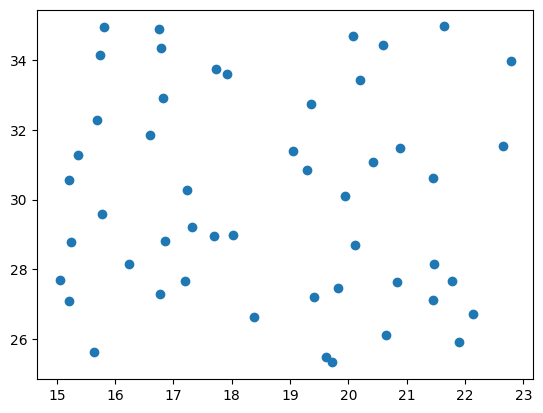

In [307]:
import matplotlib.pyplot as plt

plt.plot(data[:,0],data[:,1], "o")





In [308]:
# file handling for "pikachu.txt" + same "cleaning" procedure  

with open ("pikachu.txt", "r") as file:
    content = file.read()

print(content)

(width (cm), height (cm))
(18.137772263313835, 44.951493566608946)
(26.648661832322336, 41.49878057639454)
(26.180524428318897, 39.38100083914504)
(24.44364396490554, 40.175758410355904)
(21.201902279430513, 36.21004195868266)
(25.691541582957697, 37.24697337031557)
(19.338626083150515, 38.38085562147455)
(23.21718300802926, 40.88308718457233)
(23.444684475950478, 37.30114732596577)
(29.445791130252964, 37.20217384451559)
(28.51023528453833, 35.709930860090324)
(21.16066860901309, 41.31102957270099)
(24.00703335660358, 37.28941783811155)
(20.143822566361578, 44.054200130061275)
(28.951534072137846, 43.59635400253747)
(28.4462228380412, 35.70857349888654)
(21.581337497383593, 37.380046343689955)
(25.66739393839206, 41.68977778296281)
(25.30764253725807, 37.14236807370439)
(19.834071222595618, 36.32311848725025)
(27.150129600901813, 44.35514240580671)
(24.472548361435507, 40.710430933252844)
(27.3435177435667, 39.726710263117944)
(24.36424406634213, 42.846194242907536)
(18.00686275353532

In [309]:
content_split = content.split("\n")
content_list = content_split[1:-1]
content_list

['(18.137772263313835, 44.951493566608946)',
 '(26.648661832322336, 41.49878057639454)',
 '(26.180524428318897, 39.38100083914504)',
 '(24.44364396490554, 40.175758410355904)',
 '(21.201902279430513, 36.21004195868266)',
 '(25.691541582957697, 37.24697337031557)',
 '(19.338626083150515, 38.38085562147455)',
 '(23.21718300802926, 40.88308718457233)',
 '(23.444684475950478, 37.30114732596577)',
 '(29.445791130252964, 37.20217384451559)',
 '(28.51023528453833, 35.709930860090324)',
 '(21.16066860901309, 41.31102957270099)',
 '(24.00703335660358, 37.28941783811155)',
 '(20.143822566361578, 44.054200130061275)',
 '(28.951534072137846, 43.59635400253747)',
 '(28.4462228380412, 35.70857349888654)',
 '(21.581337497383593, 37.380046343689955)',
 '(25.66739393839206, 41.68977778296281)',
 '(25.30764253725807, 37.14236807370439)',
 '(19.834071222595618, 36.32311848725025)',
 '(27.150129600901813, 44.35514240580671)',
 '(24.472548361435507, 40.710430933252844)',
 '(27.3435177435667, 39.72671026311

In [310]:
pikachu_list = []

for point in content_list:
    
    pikachu_list.append(eval(point))

print(pikachu_list) 

[(18.137772263313835, 44.951493566608946), (26.648661832322336, 41.49878057639454), (26.180524428318897, 39.38100083914504), (24.44364396490554, 40.175758410355904), (21.201902279430513, 36.21004195868266), (25.691541582957697, 37.24697337031557), (19.338626083150515, 38.38085562147455), (23.21718300802926, 40.88308718457233), (23.444684475950478, 37.30114732596577), (29.445791130252964, 37.20217384451559), (28.51023528453833, 35.709930860090324), (21.16066860901309, 41.31102957270099), (24.00703335660358, 37.28941783811155), (20.143822566361578, 44.054200130061275), (28.951534072137846, 43.59635400253747), (28.4462228380412, 35.70857349888654), (21.581337497383593, 37.380046343689955), (25.66739393839206, 41.68977778296281), (25.30764253725807, 37.14236807370439), (19.834071222595618, 36.32311848725025), (27.150129600901813, 44.35514240580671), (24.472548361435507, 40.710430933252844), (27.3435177435667, 39.726710263117944), (24.36424406634213, 42.846194242907536), (18.006862753535323

In [311]:
data_b = np.array(pikachu_list)
data_b.shape

(50, 2)

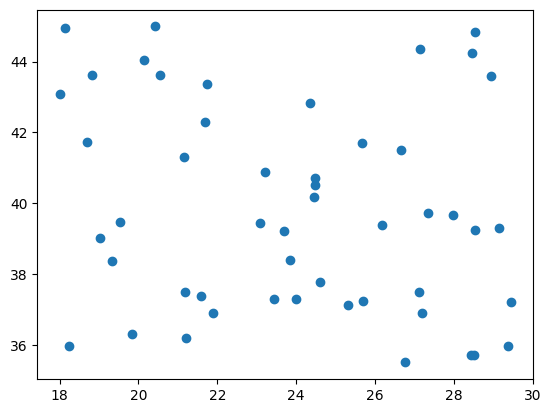

In [312]:
plt.plot(data_b[:,0],data_b[:,1], "o")

In [313]:
data = np.concatenate([data, data_b])

In [314]:
label = np.zeros([100,1])
label[50:]+=1

In [315]:
label[49]

array([0.])

In [316]:
data = np.concatenate([data, label],axis=1)

Text(0.5, 1.0, 'Pichus and Pikachus')

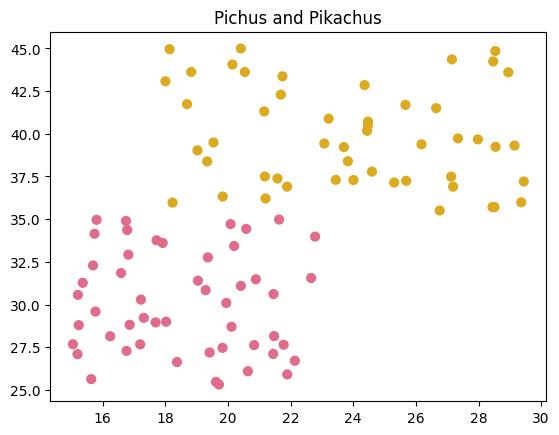

In [317]:
import matplotlib.pyplot as plt

colors = np.where(data[:, 2] > 0.5, '#DBAA1E', '#E06B8B')
pichus_pikachus = plt.scatter(x=data[:,0], y=data[:,1], c=colors, s=40)
pichus_pikachus = plt.title("Pichus and Pikachus")
pichus_pikachus 

In [318]:
with open('test_points.txt', 'r') as file:
    test_points = file.read()

test_points = eval(f"[{test_points}]")

print(test_points[0][0])

25


In [319]:
import math

def euclidean_distance(point_1, point_2):
    x1, y1 = point_1
    x2, y2 = point_2

    distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    return distance

In [331]:
distances_array_1 = np.sqrt((data[:,0] - test_points[0][0])**2 + (data[:,1] - test_points[0][1])**2)
min_distance_1 = np.min(distances_array_1)

distances_array_2 = np.sqrt((data[:,0] - test_points[1][0])**2 + (data[:,1] - test_points[1][1])**2)
min_distance_2 = np.min(distances_array_2)

distances_array_3 = np.sqrt((data[:,0] - test_points[2][0])**2 + (data[:,1] - test_points[2][1])**2)
min_distance_3 = np.min(distances_array_3)

print(min_distance_1)
print(min_distance_2)
print(min_distance_3)

1.8304663206363925
11.652774129430805
3.686062473303827
